In [1]:
import numpy as np
import pandas as pd
import scipy.io
np.random.seed(64)
XYZ_Coord = scipy.io.loadmat('data/XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [2]:
XYZ_Edges = pd.read_csv('data/Edges.csv')
XYZ_Edges

,Source,Target,Weight,Type
0,1,5,1.253704,Undirected
1,1,14,1.277093,Undirected
2,1,16,0.345464,Undirected
3,1,17,0.288327,Undirected
4,1,19,0.249381,Undirected
...,...,...,...,...
6031,1995,2000,0.104098,Undirected
6032,1996,1997,0.213520,Undirected
6033,1997,1999,0.154084,Undirected
6034,1997,2000,0.140709,Undirected


In [3]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[1.0000000e+00, 5.0000000e+00, 1.2537038e+00],
       [1.0000000e+00, 1.4000000e+01, 1.2770934e+00],
       [1.0000000e+00, 1.6000000e+01, 3.4546397e-01],
       ...,
       [1.9970000e+03, 1.9990000e+03, 1.5408415e-01],
       [1.9970000e+03, 2.0000000e+03, 1.4070934e-01],
       [1.9990000e+03, 2.0000000e+03, 4.2014991e-01]])

In [4]:
# arrange the data set clustering by the Euclidean distance
XYZ_distance_Edge = []
for i in range(np.size(XYZ_C,0)):
    for j in range(i+1,np.size(XYZ_C,0)):
        temp = 0
        for k in range(np.size(XYZ_C,1)):
            temp += (XYZ_C[i][k] - XYZ_C[j][k])**2
        XYZ_distance_Edge.append([i+1, j+1, temp**-0.5])
np.array(XYZ_distance_Edge)

array([[1.00000000e+00, 2.00000000e+00, 3.87522270e-02],
       [1.00000000e+00, 3.00000000e+00, 4.94809085e-02],
       [1.00000000e+00, 4.00000000e+00, 8.98288598e-02],
       ...,
       [1.99800000e+03, 1.99900000e+03, 4.81035854e-02],
       [1.99800000e+03, 2.00000000e+03, 4.76047389e-02],
       [1.99900000e+03, 2.00000000e+03, 4.20149911e-01]])

In [5]:
#Use the following command to install required package.
#conda install python-louvain networkx
#https://python-louvain.readthedocs.io/en/latest/index.html
#https://networkx.github.io/documentation/stable/index.html
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,2] )
    G.add_weighted_edges_from([(e)])

H = nx.Graph()
for j in range(0, len(XYZ_distance_Edge)):    
    f = ( str(int(XYZ_distance_Edge[j][0])), str(int(XYZ_distance_Edge[j][1])), XYZ_distance_Edge[j][2] )
    H.add_weighted_edges_from([(f)])

In [6]:
partition = community.best_partition(G)
geo_community = float(len(set(partition.values())))
mod = community.modularity(partition,G)
for i in range(5):
    partition_2 = community.best_partition(G)
    geo_community_2 = float(len(set(partition.values())))
    mod_2 = community.modularity(partition,G)
    if mod_2 > mod:
        partition = partition_2
        geo_community = geo_community_2
        mod = mod_2
print("geo_community:", geo_community)
print("geo_modularity:", mod)

partition2 = community.best_partition(H)
euc_community = float(len(set(partition2.values())))
mod2 = community.modularity(partition2,H)
for j in range(5):
    partition2_2 = community.best_partition(H)
    euc_community_2 = float(len(set(partition2.values())))
    mod2_2 = community.modularity(partition2,H)
    if mod2_2 > mod2:
        partition2 = partition2_2
        euc_community = euc_community_2
        mod2 = mod2_2
print("euc_community:", euc_community)
print("euc_modularity:", mod2)   

geo_community: 42.0
geo_modularity: 0.9369840401776774
euc_community: 5.0
euc_modularity: 0.1825094201580249


'Geodesic community'

Community 0
['1', '5', '14', '16', '17', '19', '25', '58', '92', '12', '13', '34', '36', '53', '90', '62', '66', '63', '57', '65', '93', '75', '87', '88', '113', '110', '129', '83', '86', '115', '126', '98', '111', '116', '117', '127']
Community 1
['2', '15', '22', '27', '41', '44', '3', '6', '18', '21', '26', '33', '35', '45', '56', '70', '59', '23', '30', '77', '84', '102', '28', '61', '64', '67', '108', '85', '81', '97', '100', '109']
Community 2
['8', '9', '10', '24', '20', '46', '79', '31', '74', '43', '54', '73', '121', '89', '91', '95', '71', '105']
Community 3
['4', '7', '11', '29', '32', '37', '49', '52', '68', '39', '60', '76', '55', '47', '51', '72', '82', '38', '42', '48', '96', '94', '103', '124', '99', '101', '107', '119']
Community 4
['78', '40', '50', '69', '80', '106', '112', '131', '144', '155', '118', '133', '159', '120', '140', '147', '125', '138', '148', '145', '153', '137', '141', '136', '157', '160', '142', '166', '175', '169', '193', '172', '199', '194', '203', 

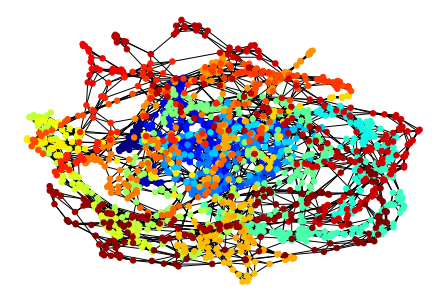

'Euclidean community'

Community 0
['930', '934', '936', '939', '941', '942', '943', '944', '945', '946', '947', '948', '949', '950', '951', '952', '953', '954', '955', '956', '957', '958', '959', '960', '961', '962', '963', '964', '965', '966', '967', '968', '969', '970', '971', '972', '973', '974', '975', '976', '977', '978', '979', '980', '981', '982', '983', '984', '985', '986', '987', '988', '989', '990', '991', '992', '993', '994', '995', '996', '997', '998', '999', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1046', '1047', '1048', '1049', '1050', '1051', '1052', '1053', '1054', '1056', '1577', '1579', '1580', '1581', '1582', '1584', '1585', '1586', '1587', '1588', '1589', '1590', '1591', '1

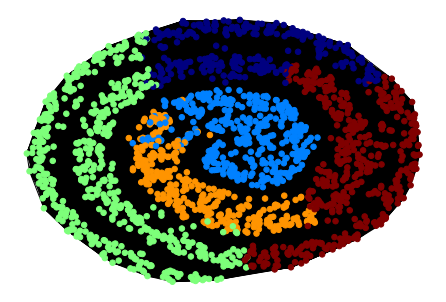

In [7]:
#assign node color based on geodesic community in network
display('Geodesic community')
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()

#assign node color based on Euclidean community in network
display('Euclidean community')
for com2 in set(partition2.values()) :
    print("Community", com2)
    members2 = list_nodes2 = [nodes2 for nodes2 in partition2.keys() if partition2[nodes2] == com2]
    print(members2)
values2 = [partition2.get(node2) for node2 in H.nodes()]
nx.draw_spring(H, cmap = plt.get_cmap('jet'), node_color = values2, node_size = 30, with_labels = False)
plt.show()          

In [8]:
#assign data point color based on geodesic community in realspace
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C))      

#assign data point color based on Euclidean community in realspace
label2 = np.zeros((len(XYZ_C),1))
for j in set(partition2.values()) :
    for i in range(len(XYZ_C)) :
        if partition2[str(i+1)] == j :            
            label2[i] =  j
labelRE2 = np.reshape(label2, len(XYZ_C))

'the geodesic distance classification'

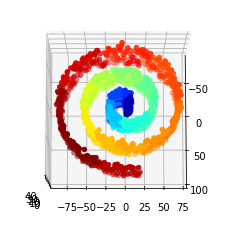

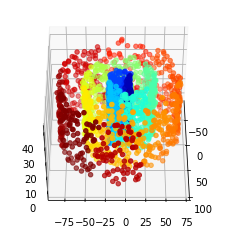

In [9]:
# use modularity to run clustering by the geodesic distance
from mpl_toolkits.mplot3d import Axes3D
display("the geodesic distance classification")
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

'the geodesic distance classification(generate by kmean)'

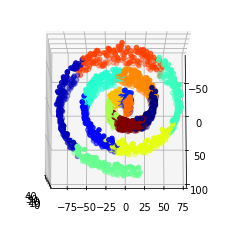

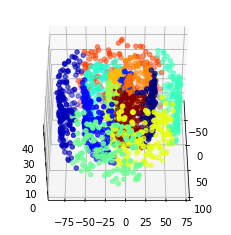

In [10]:
display('the geodesic distance classification(generate by kmean)')
from sklearn.cluster import KMeans
clusters_swiss_roll_Geodesic = KMeans(n_clusters = int(geo_community), random_state = 0).fit_predict(XYZ_E)

label3 = np.zeros((len(XYZ_C),1))
for j in clusters_swiss_roll_Geodesic:
    for i in range(len(XYZ_C)) :
        if clusters_swiss_roll_Geodesic[i+1] == j:            
            label3[i] =  j
labelRE3 = np.reshape(label3, len(XYZ_C))

z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
fig3 = plt.figure()
ax = fig3.add_subplot(111,projection='3d')
ax.scatter(x, y, z, c = labelRE3, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig4 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, c = labelRE3, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

'the euclidean distance classification'

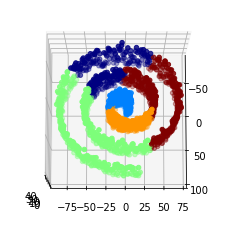

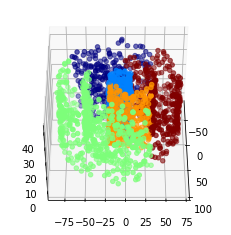

In [11]:
# use modularity to run clustering by the Euclidean distance
display("the euclidean distance classification")
fig5 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE2
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig6 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE2
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

'the euclidean distance classification(generate by kmean)'

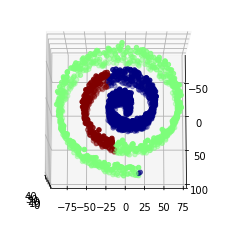

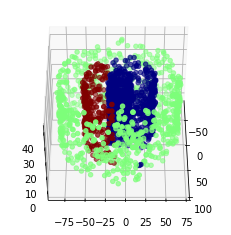

In [12]:
display('the euclidean distance classification(generate by kmean)')
from sklearn.cluster import KMeans
clusters_swiss_roll_Euclidean = KMeans(n_clusters = int(euc_community), random_state = 0).fit_predict(XYZ_distance_Edge)

label4 = np.zeros((len(XYZ_C),1))
for j in clusters_swiss_roll_Euclidean:
    for i in range(len(XYZ_C)) :
        if clusters_swiss_roll_Euclidean[i+1] == j:            
            label4[i] =  j
labelRE4 = np.reshape(label4, len(XYZ_C))

z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
fig7 = plt.figure()
ax = fig7.add_subplot(111,projection='3d')
ax.scatter(x, y, z, c=labelRE4, cmap=plt.get_cmap('jet'))
ax.view_init(80, 0)

fig8 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, c = labelRE4, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)